In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# functions

def clean_raw_data(clean_df, raw_data_file, skip):
    raw_data = pd.read_csv(raw_data_file, sep='\t', header=None, skiprows=skip)
    data_col = raw_data[0]

    for row in range(0, len(data_col)):

        data_row = list(map(str, data_col[row].split())) # reformat to make string into list delimited by spaces
        # print(data_row)
        add_row = {} # initialize, and clear dictionary for each row

        for i in range(0, len(data_row)):
            add_row = {'year': data_row[0], 
                    'month': data_row[1],
                    'monthly_anom': data_row[2],
                    'monthly_unc': data_row[3], 
                    'one_yr_anom': data_row[4], 
                    'one_yr_unc': data_row[5]}
            
       

        clean_df = clean_df._append(add_row, ignore_index=True) # append is being depricated, todo: use concat or merge

    # cast year and  month as  int - todo, make timestamp
    clean_df['year'] = clean_df['year'].astype(int)
    clean_df['month'] = clean_df['month'].astype(int)

    # cast weather data (columns 2-5) as floats
    clean_df['monthly_anom'] = clean_df['monthly_anom'].astype(float)
    clean_df['monthly_unc'] = clean_df['monthly_unc'].astype(float)
    clean_df['one_yr_anom'] = clean_df['one_yr_anom'].astype(float)
    clean_df['one_yr_unc'] = clean_df['one_yr_unc'].astype(float)
        
    return clean_df

In [17]:
# files and constants
south_america_file = '../SouthAmerica_raw.txt'
lima_file = '../Lima_Peru_raw.txt'
santiago_file = '../Santiago_Chile_raw.txt'
saopaulo_file = '../SaoPaulo_Brazil_raw.txt'
rio_file = '../Rio2.txt'

weather_cols = ['year', 'month', 'monthly_anom', 'monthly_unc', 'one_yr_anom', 'one_yr_unc']


In [24]:
# clean data
south_data = pd.DataFrame(columns=weather_cols)
south_data = clean_raw_data(south_data, south_america_file, 71)

lima_data = pd.DataFrame(columns=weather_cols)
lima_data = clean_raw_data(lima_data, lima_file, 71)

santiago_data = pd.DataFrame(columns=weather_cols)
santiago_data = clean_raw_data(santiago_data, santiago_file, 69)

# saopaulo_data = pd.DataFrame(columns=weather_cols)
# saopaulo_data = clean_raw_data(saopaulo_data, saopaulo_file, 70)

# rio_data = pd.DataFrame(columns=weather_cols)
# rio_data = clean_raw_data(rio_data, rio_file, 70)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 1600: invalid continuation byte

In [ ]:
# check data
# south_data.info
# lima_data.info
# santiago_data.info
# type(saopaulo_data['year'][0])

# saopaulo_data['year'] = saopaulo_data['year'].astype(int)
# print(saopaulo_data.dtypes)





In [ ]:
columns_to_keep = ['year', 'month', 'one_yr_anom', 'one_yr_unc']

# df_sa = south_data
# df_sa = santiago_data
df_sa = lima_data

sd_cleaned = df_sa[columns_to_keep]

sd_cleaned = sd_cleaned.dropna(axis=1, how='all')
    



sd_cleaned.head()



,year,month,one_yr_anom,one_yr_unc
0,1892,1,NaN,NaN
1,1892,2,NaN,NaN
2,1892,3,NaN,NaN
3,1892,4,NaN,NaN
4,1892,5,NaN,NaN


In [11]:
# Ensure 'anom' is numeric
sd_cleaned['one_yr_anom'] = pd.to_numeric(sd_cleaned['one_yr_anom'], errors='coerce')

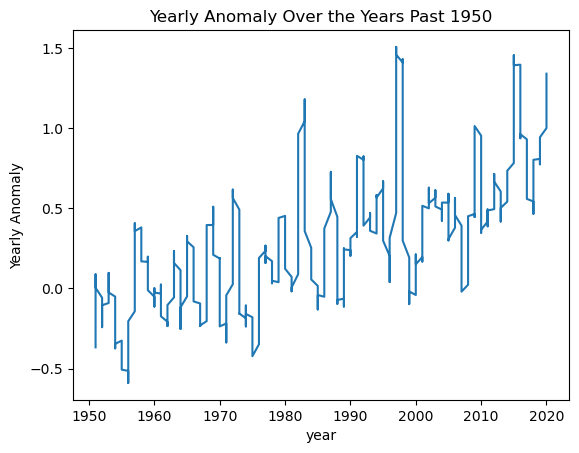

,year,month,one_yr_anom,one_yr_unc
708,1951,1,-0.368,0.173
709,1951,2,-0.309,0.163
710,1951,3,-0.268,0.151
711,1951,4,-0.201,0.145
712,1951,5,-0.165,0.148
...,...,...,...,...
1543,2020,8,NaN,NaN
1544,2020,9,NaN,NaN
1545,2020,10,NaN,NaN
1546,2020,11,NaN,NaN


In [12]:
# Ensure 'year' is an integer
sd_cleaned['year'] = sd_cleaned['year'].astype(int)

# Filter data for years past 1950
filtered_data = sd_cleaned[sd_cleaned['year'] > 1950]

# Verify filtered data is not empty and contains numeric values
if not filtered_data.empty and pd.api.types.is_numeric_dtype(filtered_data['one_yr_anom']):
    # Plot the filtered data
    filtered_data.set_index('year')['one_yr_anom'].plot()

    plt.xlabel('year')
    plt.ylabel('Yearly Anomaly')
    plt.title('Yearly Anomaly Over the Years Past 1950')
    plt.show()
else:
    print("No numeric data available for years past 1950 or the column is non-numeric.")

# Display the filtered data
display(filtered_data)